Intern Assignment

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [6]:
df.shape

(6362620, 11)

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Data Analysis - Missing values, Outliers, multi-collinearity.

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [13]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [14]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='type'>

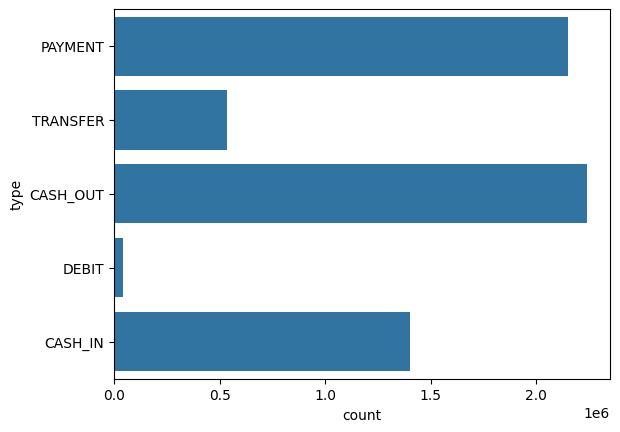

In [15]:
sns.countplot(df.type)

<Axes: xlabel='isFraud', ylabel='count'>

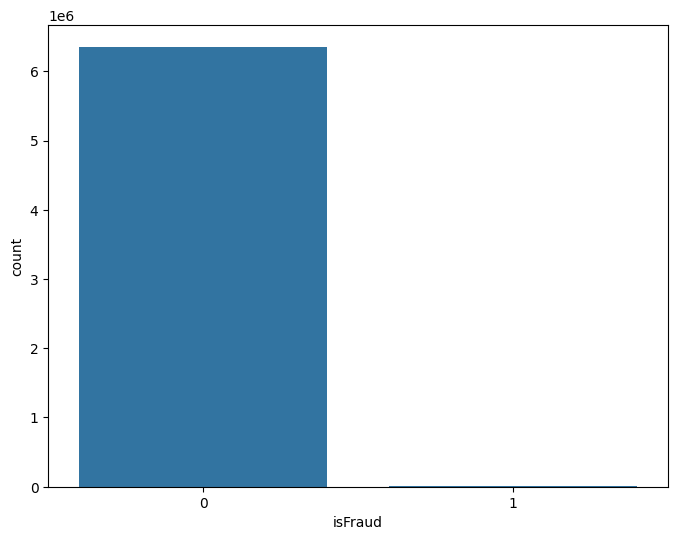

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='isFraud', data=df)

In [22]:
##coverting categorical features to numerical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.type=label.fit_transform(df.type)
df.nameOrig=label.fit_transform(df.nameOrig)
df.nameDest=label.fit_transform(df.nameDest)

<Axes: >

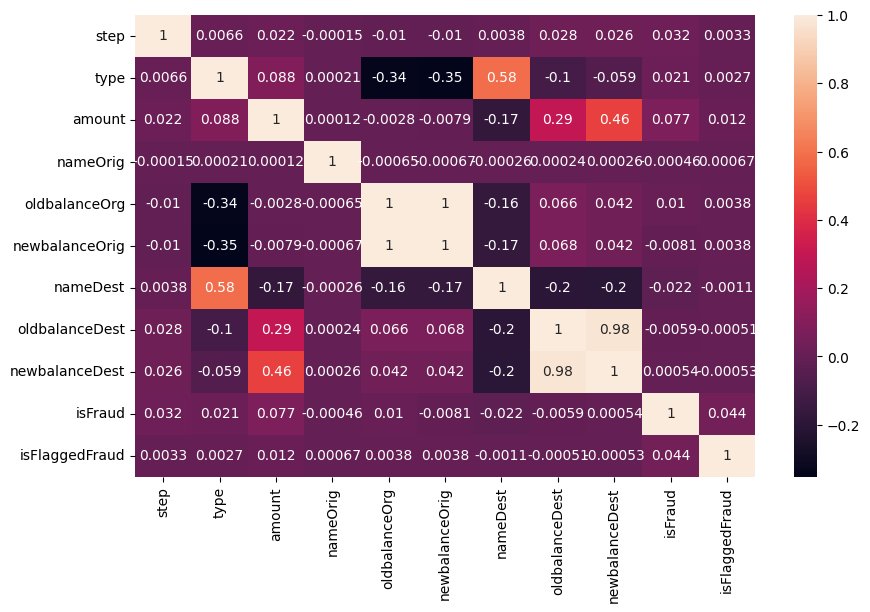

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [24]:
corr_matrix = df.corr()
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
type              0.002685
nameOrig          0.000667
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
nameDest         -0.001122
Name: isFlaggedFraud, dtype: float64

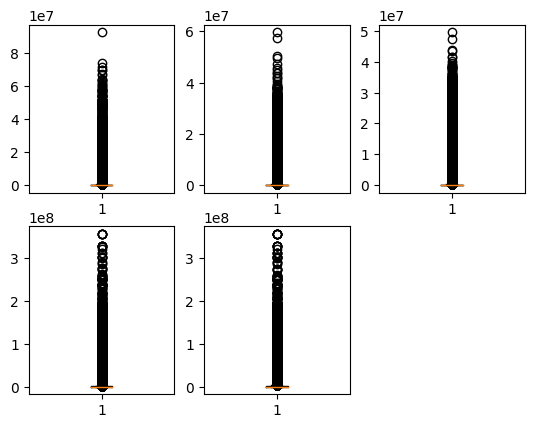

In [25]:
plt.subplot(2, 3, 1)
plt.boxplot(df['amount'])


plt.subplot(2, 3, 2)
plt.boxplot(df['oldbalanceOrg'])


plt.subplot(2, 3, 3)
plt.boxplot(df['newbalanceOrig'])


plt.subplot(2, 3, 4)
plt.boxplot(df['oldbalanceDest'])


plt.subplot(2, 3, 5)
plt.boxplot(df[ 'newbalanceDest'])

plt.show()

In [38]:
##Downsampling to handle imbalance
count_0, count_1 = df['isFraud'].value_counts()
count_0, count_1

(6354407, 8213)

In [40]:
df_0 = df[df['isFraud'] == 0]
df_1 = df[df['isFraud'] == 1]

In [41]:
df_0_under = df_0.sample(count_1)

In [42]:
df = pd.concat([df_0_under, df_1],axis=0)

In [43]:
df.shape

(16426, 11)

In [45]:
df['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [47]:
Q1 = np.percentile(df['amount'],25)
Q3 = np.percentile(df['amount'],75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [48]:
df = df[(df['amount']>lower_limit) & (df['amount']<upper_limit)]

In [49]:
df.shape

(14052, 11)

Model Building

In [58]:
X = df.drop(['isFraud','oldbalanceDest','nameDest','newbalanceDest'],axis =1)
y = df['isFraud']

In [59]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,isFlaggedFraud
15517,8,3,11189.30,3200032,0.00,0.00,0
3056338,234,3,16694.72,4677884,5273.00,0.00,0
1851452,164,1,251947.67,736812,4635.00,0.00,0
5433951,378,0,161002.89,5251526,7846137.48,8007140.36,0
4145804,303,3,35569.55,3720557,0.00,0.00,0
...,...,...,...,...,...,...,...
6362613,743,1,1258818.82,1432154,1258818.82,0.00,0
6362614,743,4,339682.13,3332123,339682.13,0.00,0
6362615,743,1,339682.13,5651847,339682.13,0.00,0
6362618,743,4,850002.52,2252932,850002.52,0.00,0


In [60]:
y

15517      0
3056338    0
1851452    0
5433951    0
4145804    0
          ..
6362613    1
6362614    1
6362615    1
6362618    1
6362619    1
Name: isFraud, Length: 14052, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [61]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1622
           1       0.98      0.99      0.99      1189

    accuracy                           0.99      2811
   macro avg       0.99      0.99      0.99      2811
weighted avg       0.99      0.99      0.99      2811



In [64]:
from sklearn.metrics import average_precision_score

In [68]:
aps2 = average_precision_score(y_test, rfc.predict(X_test))
print(aps2)

0.9813609921376797


In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

ran_parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap':[True, False],
                 'criterion':['gini', 'entropy']}

In [73]:
ran_cv = RandomizedSearchCV(estimator=rfc, param_distributions=ran_parameters, cv=3, n_jobs=-1, verbose=2)

In [74]:
ran_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 11, 17, 23, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=2)

In [75]:
print(classification_report(y_test, ran_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1622
           1       0.98      0.99      0.99      1189

    accuracy                           0.99      2811
   macro avg       0.99      0.99      0.99      2811
weighted avg       0.99      0.99      0.99      2811



In [76]:
from xgboost import XGBClassifier

In [77]:
xgb = XGBClassifier()

In [78]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1622
           1       0.98      0.99      0.99      1189

    accuracy                           0.99      2811
   macro avg       0.99      0.99      0.99      2811
weighted avg       0.99      0.99      0.99      2811



**conclusion**

Built Random Forest and XGBoost classification models to predict whether transaction is fraud.
Optimized the models with hyperparameter tuning using RandomizedSearchCV.

1 - The dataset doesn't consist any missing value. For ouliers removal I have used the IQR (Interquartile Range) method considering 25 percentile and 75 percentile and considered the data between the upper and the lower limit.

2 - The fraud detection model (XGBoost) tries to analyze the pattern of fraudulent transactions by making use of different modelling techniques and using the results obtained from our study we intend to predict and prevent similar fraud cases in future.The model detects fraud based on factors like type of transaction, amount etc.

3 - For selecting variables including in the model I have plotted the heatmap of correlation. Based on that i removed oldbalanceDest newbalanceDest nameDest columns. Six columns - isFraud, amount, oldbalanceOrg, newbalanceOrig, step and type  are the most important features to be included in the model as they have relatively good correlation with the target column.

4 - The dataset is imbalanced, so here precision matters more than the accuracy. Random Forest model has the highest precision(0.99) and also has the accuracy score of 1.

5 - From the heatmap of correlation, it is seen that step, amount, Type, and isFlaggedFraud are the 4 key factors that predict fraudulent customers.

6 - Yes these factors make sense as we have seen that Cash out and payment are the most comman type which have very high fradaulent transactions.

7 - Setlimit to amount of transaction that can happen, if the tranaction is above the limit the company should add measures to verify the transaction and this transaction should be kept under tight watch.

8 - If these actions are implemented, it woukd bring the situation under control and give the company less overhead to worry after the transaction as there will be tight measures when the transaction is taking place.